<h2>Importing Libraries</h2>

Purpose: Loads essential Python libraries for data manipulation (pandas, numpy) and visualization (matplotlib, seaborn).

Why it matters: These are the core tools for cleaning, exploring, and visualizing the Titanic dataset.

<h2>Loading the Dataset</h2>
Purpose: Reads the CSV file into a DataFrame and displays the first few rows.

Why it matters: This is your first look at the data helps verify it loaded correctly and gives a sense of the structure.

In [2]:
def import_libraries():
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    print("Libraries imported successfully.")


In [3]:
def check_environment():
    import os
    cwd = os.getcwd()
    files = os.listdir()
    print(f"Current working directory: {cwd}")
    print(f"Files in directory: {files}")


In [4]:
def load_dataset(filename='Project_1.csv'):
    import pandas as pd
    try:
        df = pd.read_csv(filename)
        print(f"Dataset '{filename}' loaded successfully.")
        print(f"Data shape: {df.shape}")
        return df
    except FileNotFoundError:
        print(f"Error: '{filename}' not found in the current directory.")
        return None


In [5]:
def run_setup():
    import_libraries()
    check_environment()
    df = load_dataset()
    return df

# Execute setup
df = run_setup()


Libraries imported successfully.
Current working directory: /drive/Project_1
Files in directory: ['Project_1.csv', 'Project_1.ipynb']
Dataset 'Project_1.csv' loaded successfully.
Data shape: (418, 12)


<h2>Exploratory Data Analysis (EDA)</h2>

Purpose:

info() shows data types and non-null counts.

describe() gives summary stats for numeric columns.

isnull().sum() reveals missing values.

Why it matters: Helps you assess data quality and decide what needs cleaning or imputing.

In [6]:
# 2.1 Peek at the first rows
df.head()

# 2.2 Structure and summary statistics
df.info()
df.describe(include='all').T

# 2.3 Missing values by column
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 31.1+ KB


Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<h2>Data Cleaning</h2>

Purpose:

Fills missing Age with median.

Fills missing Embarked with most common value.

Drops Cabin due to excessive missing data.

Why it matters: Prepares the dataset for analysis and modeling by handling nulls.

<h2>Feature Engineering</h2>

Purpose:

FamilySize combines family-related columns.

IsAlone flags solo travelers.

Title extracts honorifics from names.

Why it matters: These new features often improve model performance and storytelling.

<h2>Visualizations</h2>

Purpose: Uses Seaborn to visualize survival rates, class distribution, and age by class.

Why it matters: Reveals patterns and relationships that inform the narrative and modeling.

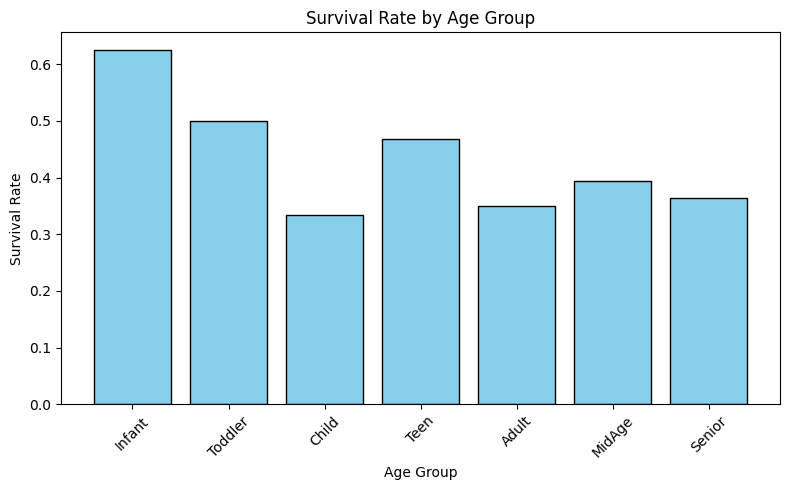

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Project_1.csv')

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,1,2,10,20,40,60,80], 
                        labels=['Infant','Toddler','Child','Teen','Adult','MidAge','Senior'])

# Drop rows with missing AgeGroup (due to NaNs in Age)
df = df.dropna(subset=['AgeGroup'])

# Calculate survival rate per age group
surv_age = df.groupby('AgeGroup', observed=True)['Survived'].mean().reset_index()

# Plot using matplotlib
plt.figure(figsize=(8,5))
plt.bar(surv_age['AgeGroup'].astype(str), surv_age['Survived'], color='skyblue', edgecolor='black')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


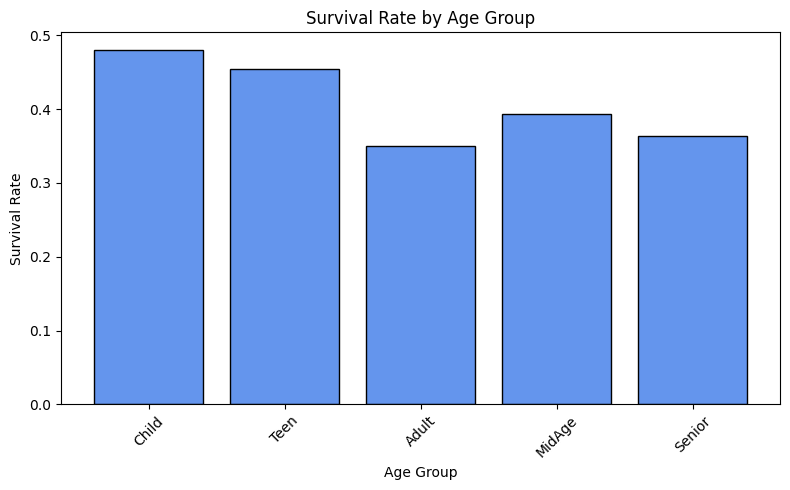

In [8]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,20,40,60,100],
                        labels=['Child','Teen','Adult','MidAge','Senior'])
surv_age = df.groupby('AgeGroup', observed=True)['Survived'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.bar(surv_age['AgeGroup'].astype(str), surv_age['Survived'], color='cornflowerblue', edgecolor='black')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


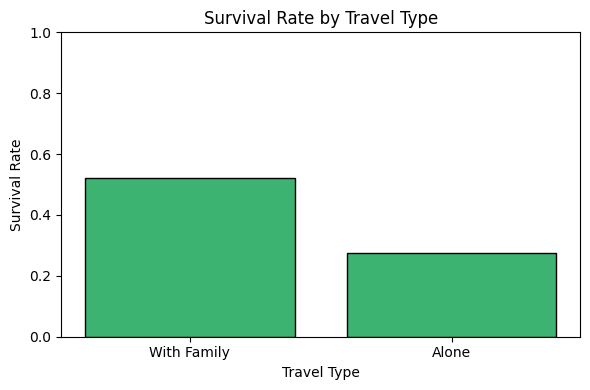

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Create IsAlone feature if it's missing
if 'IsAlone' not in df.columns and 'SibSp' in df.columns and 'Parch' in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Group by IsAlone and calculate survival rate
surv_family = df.groupby('IsAlone')['Survived'].mean().reset_index()

# Map travel type labels
surv_family['TravelType'] = surv_family['IsAlone'].map({0: 'With Family', 1: 'Alone'})

# Plot using matplotlib
plt.figure(figsize=(6,4))
plt.bar(surv_family['TravelType'], surv_family['Survived'], color='mediumseagreen', edgecolor='black')
plt.title('Survival Rate by Travel Type')
plt.xlabel('Travel Type')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

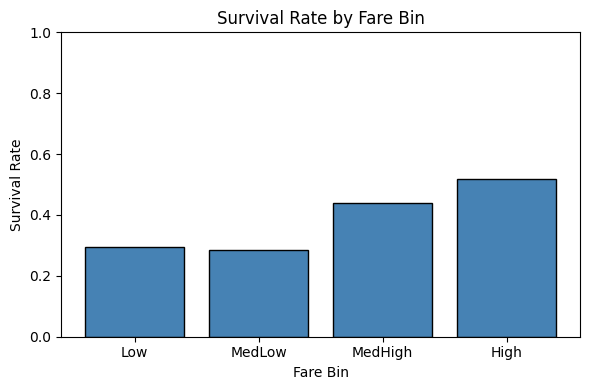

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a copy of the DataFrame
fare_df = df.copy()

# Bin Fare into quartiles
fare_df['FareBinCat'] = pd.qcut(fare_df['Fare'], 4,
                                labels=['Low','MedLow','MedHigh','High'])

# Drop rows with missing FareBinCat (if any)
fare_df = fare_df.dropna(subset=['FareBinCat'])

# Calculate survival rate per fare bin
surv_fare = fare_df.groupby('FareBinCat', observed=True)['Survived'].mean().reset_index()

# Plot using matplotlib
plt.figure(figsize=(6,4))
plt.bar(surv_fare['FareBinCat'].astype(str), surv_fare['Survived'], color='steelblue', edgecolor='black')
plt.title('Survival Rate by Fare Bin')
plt.xlabel('Fare Bin')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


<h2>Model Preparation</h2>

Purpose: Imports tools for splitting data, building a model, and evaluating performance.

Why it matters: Sets the stage for predictive modeling.

<h2>Model Training and Evaluation</h2>

Purpose:

Selects features and encodes categorical variables.

Splits data into training/testing sets.

Trains a logistic regression model and evaluates accuracy.

Why it matters: This is the first predictive model—simple, interpretable, and a great baseline.

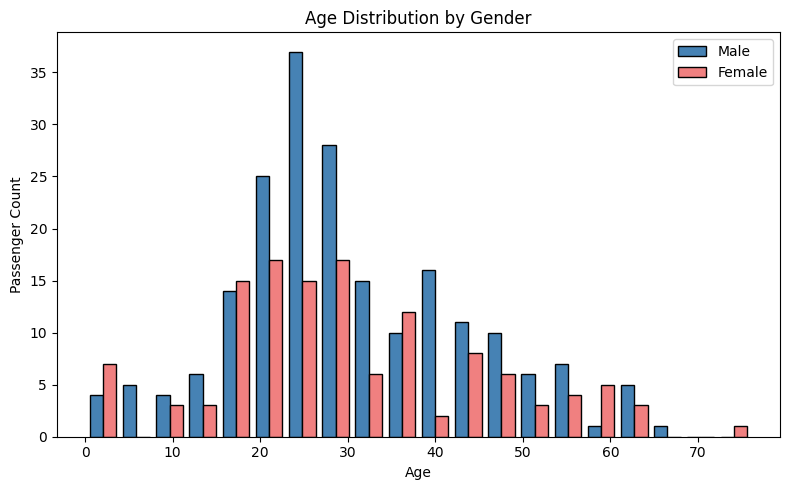

In [11]:
import matplotlib.pyplot as plt

# Drop rows with missing Age or Sex
age_gender_df = df.dropna(subset=['Age', 'Sex'])

# Split by gender
male_ages = age_gender_df[age_gender_df['Sex'] == 'male']['Age']
female_ages = age_gender_df[age_gender_df['Sex'] == 'female']['Age']

# Plot
plt.figure(figsize=(8,5))
plt.hist([male_ages, female_ages], bins=20, stacked=False, 
         label=['Male', 'Female'], color=['steelblue', 'lightcoral'], edgecolor='black')

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
import matplotlib.pyplot as plt

def barplot(column_name, title=None):
    """
    Plots a bar chart showing the count of each category in a given column.

    Parameters:
    column_name (str): The name of the categorical column in the DataFrame `df`.
    title (str, optional): Custom title for the plot. Defaults to the column name.

    Output:
    Displays a matplotlib bar chart of value counts.
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    counts = df[column_name].value_counts(dropna=False)

    plt.figure(figsize=(6,4))
    counts.plot(kind='bar', color='slateblue', edgecolor='black')
    plt.title(title if title else f'{column_name} Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
